In [2]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_data = pd.read_csv('../data/contributors_summary_lappis.csv')
eps_data = pd.read_csv('../data/contributors_summary_eps_mds.csv')

display(lappis_data.head(), eps_data.head())

,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'..."
1,GeovaneSFT,630,20,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 343, 'pull_requests': 4, 'issues':..."
2,AnHoff,435,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 366, 'pull_requests': 19, 'issues'..."
3,davidCarlos,3028,24,Python,"{'2017-01': 10, '2017-02': 5, '2017-03': 4, '2...","{'commits': 2719, 'pull_requests': 11, 'issues..."
4,isabellacgmsa,752,60,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 605, 'pull_requests': 46, 'issues'..."


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,StrangeUnit28,552,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 410, 'pull_requests': 43, 'issues'..."
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ..."
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'..."
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ..."
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues..."


In [3]:
lappis_summary = lappis_data.describe()

eps_summary = eps_data.describe()

display(lappis_summary, eps_summary)

,contributions,repositories
count,45.000000,45.000000
mean,972.377778,34.622222
std,1099.236394,24.952946
min,23.000000,5.000000
25%,348.000000,16.000000
50%,596.000000,31.000000
75%,1049.000000,41.000000
max,5930.000000,111.000000


,contributions,repositories
count,6254.000000,6254.000000
mean,2344.217141,52.418612
std,5376.626238,91.790838
min,0.000000,0.000000
25%,158.000000,14.000000
50%,650.000000,31.000000
75%,2358.000000,61.000000
max,167547.000000,4241.000000


In [4]:
import pandas as pd
import json

def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def prepare_data(df):
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)
    
    df_types = pd.json_normalize(df['contribution_types'])
    for col in df_types.columns:
        df[col] = df_types[col]
    
    return df

def remove_specified_outliers(df, columns):
    for col in columns:
        df = remove_outliers(df, col)
    return df

columns_to_filter = ['contributions', 'repositories', 'commits', 'pull_requests', 'issues', 'reviews']

# lappis_data = prepare_data(lappis_data)
eps_data = prepare_data(eps_data)

# lappis_filtered = remove_specified_outliers(lappis_data, columns_to_filter)
eps_filtered = remove_specified_outliers(eps_data, columns_to_filter)

# display(lappis_filtered.describe(), eps_filtered.describe())


In [5]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df, column):
    scaler = MinMaxScaler()
    df[column + '_normalized'] = scaler.fit_transform(df[[column]])
    return df

lappis_normalized = normalize_data(lappis_filtered, 'contributions')
eps_normalized = normalize_data(eps_filtered, 'contributions')

display(lappis_normalized.head(), eps_normalized.head())


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
lappis_count = lappis_normalized.shape[0]
eps_count = eps_normalized.shape[0]

if eps_count > lappis_count:
    eps_balanced = eps_normalized.sample(n=lappis_count, random_state=42)
else:
    eps_balanced = eps_normalized

print(f"Lappis users: {lappis_count}, EPS users after undersampling: {eps_balanced.shape[0]}")

display(lappis_normalized.head(), eps_balanced.head())


In [6]:
def compute_statistics(df):
    
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Maximum Contributions': df['contributions'].max(),
        'Average Number of Repositories': df['repositories'].mean(),
        'Maximum Number of Repositories': df['repositories'].max()
    }
    return stats

lappis_stats = compute_statistics(lappis_data) 
eps_stats = compute_statistics(eps_filtered)

stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

display(stats_df)


,Number of Students,Average Contributions,Maximum Contributions,Average Number of Repositories,Maximum Number of Repositories
Regular Students,3447,516.950682,5649,24.155207,113
Laboratory Students,45,972.377778,5930,34.622222,111


In [7]:
import pandas as pd
import json

def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def compute_statistics(df):
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Average Number of Repositories': df['repositories'].mean(),
    }
    return stats

def compute_extended_statistics(df):
    df['monthly_contributions'] = df['monthly_contributions'].apply(safe_loads)
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)

    common_language = df['primary_language'].mode()[0]
    unique_languages = df['primary_language'].nunique()

    monthly_average = df['monthly_contributions'].apply(
        lambda x: sum(x.values()) / len(x) if len(x) > 0 else 0).mean()

    df_types = pd.DataFrame(list(df['contribution_types']))
    type_averages = df_types.mean().to_dict()

    stats = {
        'Most Common Language': common_language,
        'Number of Unique Languages': unique_languages,
        'Average Monthly Contributions': monthly_average,
        'Average Commits': type_averages.get('commits', 0),
        'Average Pull Requests': type_averages.get('pull_requests', 0),
        'Average Issues': type_averages.get('issues', 0),
        'Average Reviews': type_averages.get('reviews', 0)
    }
    return stats

lappis_basic_stats = compute_statistics(lappis_data)
eps_basic_stats = compute_statistics(eps_filtered)

lappis_extended_stats = compute_extended_statistics(lappis_data)
eps_extended_stats = compute_extended_statistics(eps_filtered)

lappis_stats = {**lappis_basic_stats, **lappis_extended_stats}
eps_stats = {**eps_basic_stats, **eps_extended_stats}

stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

display(stats_df)


,Number of Students,Average Contributions,Average Number of Repositories,Most Common Language,Number of Unique Languages,Average Monthly Contributions,Average Commits,Average Pull Requests,Average Issues,Average Reviews
Regular Students,3447,516.950682,24.155207,Python,48,5.568633,185.633885,25.877575,14.483899,4.132869
Laboratory Students,45,972.377778,34.622222,Python,11,10.455675,580.577778,43.777778,51.800000,19.200000


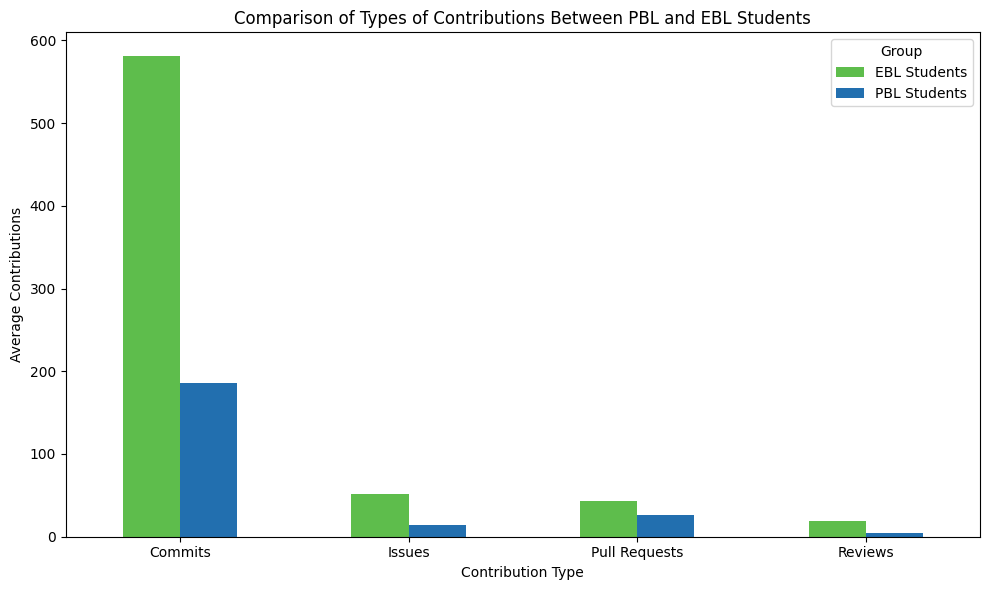

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_contribution_types = {
    'Commits': lappis_extended_stats['Average Commits'],
    'Pull Requests': lappis_extended_stats['Average Pull Requests'],
    'Issues': lappis_extended_stats['Average Issues'],
    'Reviews': lappis_extended_stats['Average Reviews']
}

eps_contribution_types = {
    'Commits': eps_extended_stats['Average Commits'],
    'Pull Requests': eps_extended_stats['Average Pull Requests'],
    'Issues': eps_extended_stats['Average Issues'],
    'Reviews': eps_extended_stats['Average Reviews']
}

data = {
    'Contribution Type': ['Commits', 'Pull Requests', 'Issues', 'Reviews']*2,
    'Average Contributions': list(lappis_contribution_types.values()) + list(eps_contribution_types.values()),
    'Group': ['EBL Students']*4 + ['PBL Students']*4
}

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Contribution Type', columns='Group', values='Average Contributions')

ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=['#5EBD4C', '#226FAF'])

plt.title('Comparison of Types of Contributions Between PBL and EBL Students')
plt.xlabel('Contribution Type')
plt.ylabel('Average Contributions')
plt.xticks(rotation=0)

plt.legend(title='Group')

plt.tight_layout()
plt.show()

plt.savefig('contribution_comparison.png', format='png')


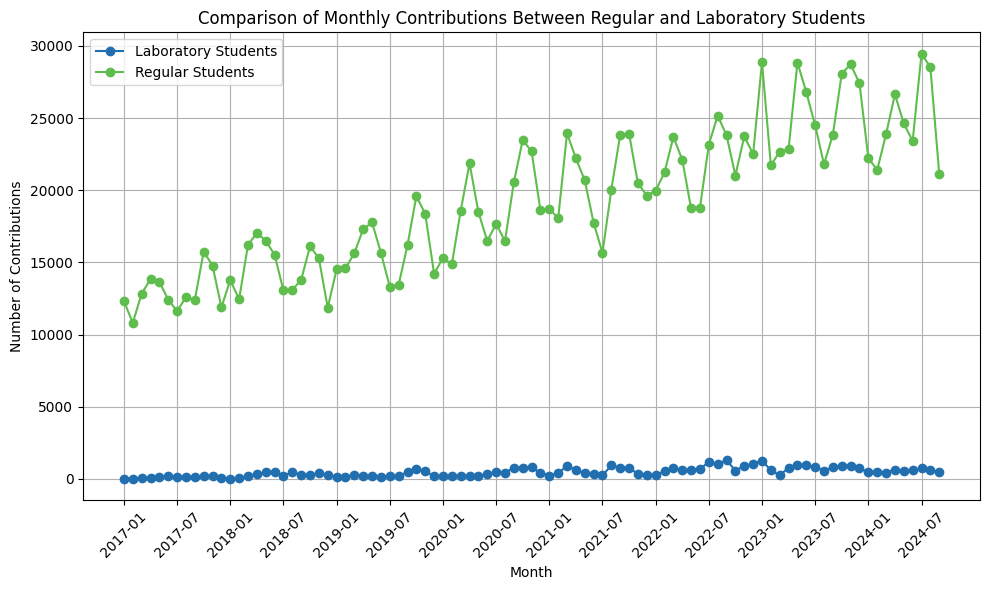

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import json

def safe_convert_to_dict(item):
    if isinstance(item, str):
        return json.loads(item.replace("'", '"'))
    return item

def prepare_monthly_data(df, column):
    df[column] = df[column].apply(safe_convert_to_dict)
    monthly_data = pd.DataFrame(df[column].tolist())
    monthly_totals = monthly_data.sum().sort_index()  
    return monthly_totals

lappis_monthly = prepare_monthly_data(lappis_data, 'monthly_contributions')
eps_monthly = prepare_monthly_data(eps_filtered, 'monthly_contributions')

plt.figure(figsize=(10, 6))
plt.plot(lappis_monthly.index, lappis_monthly.values, marker='o', linestyle='-', color='#226FAF', label='Laboratory Students')
plt.plot(eps_monthly.index, eps_monthly.values, marker='o', linestyle='-', color='#5EBD4C', label='Regular Students')

plt.title('Comparison of Monthly Contributions Between Regular and Laboratory Students')
plt.xlabel('Month')
plt.ylabel('Number of Contributions')
plt.xticks(ticks=range(0, len(lappis_monthly), 6), labels=lappis_monthly.index[::6], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('monthly_comparison.png', format='png')


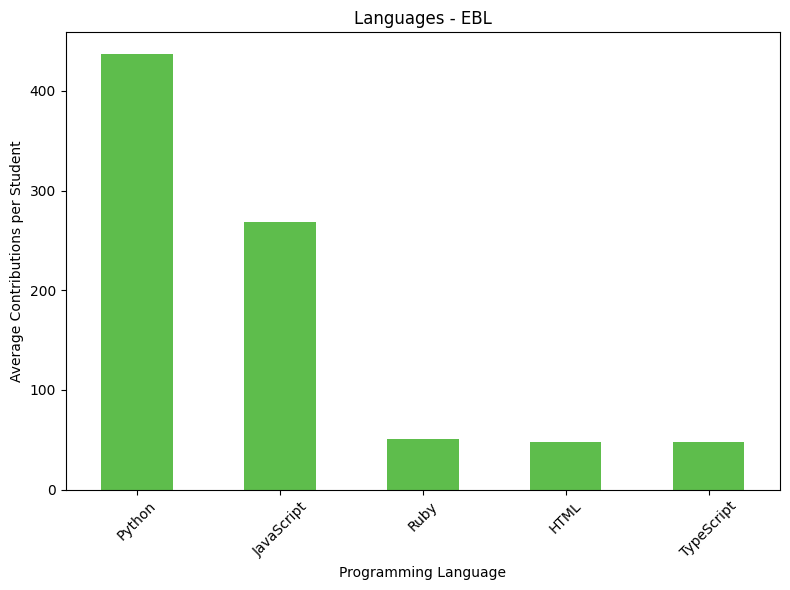

<Figure size 640x480 with 0 Axes>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Número de alunos no grupo LAPPIS
num_alunos_lappis = 45

# Agrupar e somar as contribuições por linguagem para o grupo LAPPIS, normalizando pelo número de alunos
language_contributions_lappis = lappis_data.groupby('primary_language')['contributions'].sum() / num_alunos_lappis

# Selecionar as 5 linguagens mais usadas no grupo LAPPIS
top_5_lappis = language_contributions_lappis.nlargest(5)

# Plotando o gráfico para LAPPIS
plt.figure(figsize=(8, 6))
top_5_lappis.plot(kind='bar', color='#5EBD4C')
plt.title('Languages - EBL')
plt.xlabel('Programming Language')
plt.ylabel('Average Contributions per Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('languages_comparison_ebl.png', format='png')



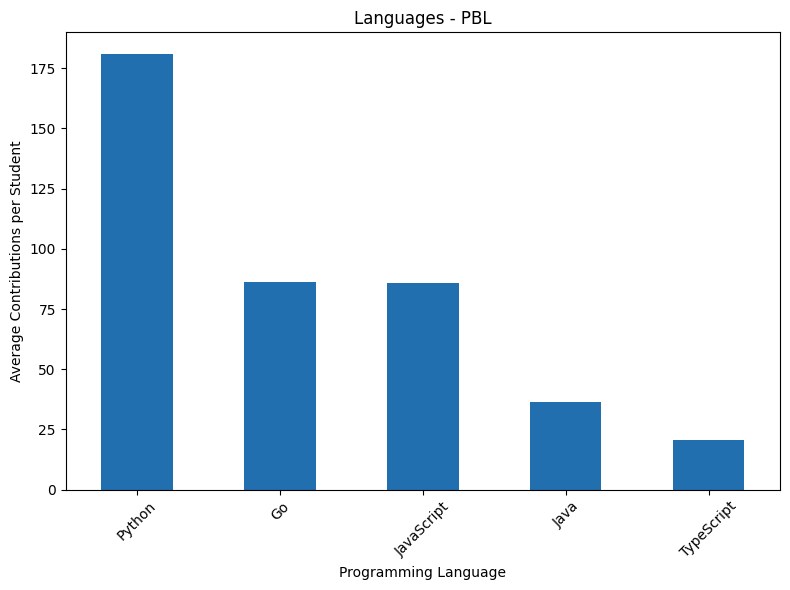

<Figure size 640x480 with 0 Axes>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Número de alunos no grupo EPS/MDS
num_alunos_eps_mds = 3447

# Agrupar e somar as contribuições por linguagem para o grupo EPS/MDS, normalizando pelo número de alunos
language_contributions_eps_mds = eps_filtered.groupby('primary_language')['contributions'].sum() / num_alunos_eps_mds

# Selecionar as 5 linguagens mais usadas no grupo EPS/MDS
top_5_eps_mds = language_contributions_eps_mds.nlargest(5)

# Plotando o gráfico para EPS/MDS
plt.figure(figsize=(8, 6))
top_5_eps_mds.plot(kind='bar', color='#226FAF')
plt.title('Languages - PBL')
plt.xlabel('Programming Language')
plt.ylabel('Average Contributions per Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('languages_comparison_pbl.png', format='png')


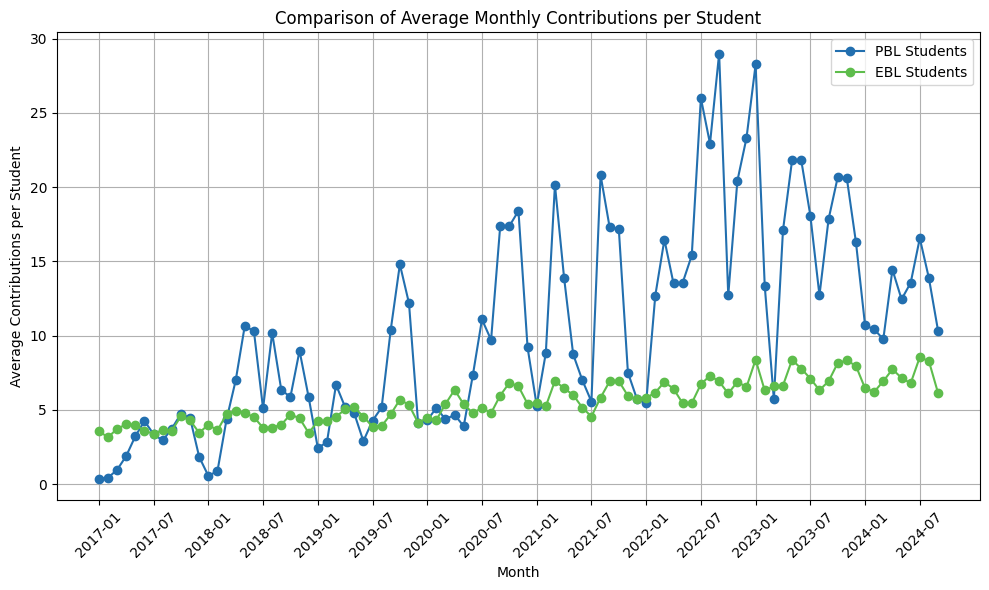

<Figure size 640x480 with 0 Axes>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import json

def safe_convert_to_dict(item):
    if isinstance(item, str):
        return json.loads(item.replace("'", '"'))
    return item

def prepare_monthly_data(df, column, num_students):
    df[column] = df[column].apply(safe_convert_to_dict)
    monthly_data = pd.DataFrame(df[column].tolist())
    monthly_totals = monthly_data.sum().sort_index()
    monthly_average = monthly_totals / num_students  # Calcular a média por aluno
    return monthly_average

# Número de alunos em cada grupo
num_alunos_lappis = 45
num_alunos_eps_mds = 3447

# Preparar os dados mensais para cada grupo, calculando a média
lappis_monthly_avg = prepare_monthly_data(lappis_data, 'monthly_contributions', num_alunos_lappis)
eps_monthly_avg = prepare_monthly_data(eps_filtered, 'monthly_contributions', num_alunos_eps_mds)

# Plotando o gráfico com as médias mensais
plt.figure(figsize=(10, 6))
plt.plot(lappis_monthly_avg.index, lappis_monthly_avg.values, marker='o', linestyle='-', color='#226FAF', label='PBL Students')
plt.plot(eps_monthly_avg.index, eps_monthly_avg.values, marker='o', linestyle='-', color='#5EBD4C', label='EBL Students')

plt.title('Comparison of Average Monthly Contributions per Student')
plt.xlabel('Month')
plt.ylabel('Average Contributions per Student')
plt.xticks(ticks=range(0, len(lappis_monthly_avg), 6), labels=lappis_monthly_avg.index[::6], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Salvando o gráfico como imagem
plt.savefig('average_monthly_comparison.png', format='png')
